In [ ]:
# Plot jailbreak eval stats

In [ ]:
library(tidyverse)
library(fs)
# library(ggtext)
library(systemfonts)

ws = '/workspace/deliberative-alignment-jailbreaks'

source(paste0(ws, '/r-utils/plots.r'))

# Load data

In [ ]:
input_df =
    dir_ls(file.path(ws, 'experiments', 'da-agent-loop'), glob = '*agent-outputs-classified-*.csv') %>%
    map(., \(f)
        read_csv(f)
    ) %>%
    list_rbind() %>%
    mutate(., target_model = fct_relevel(target_model,
        'gptoss20', 'gptoss120', 'o4-mini', 'gpt-5-nano', 'gpt-5-mini', 'gpt-5'
        )) %>%
    mutate(., target_model = recode(target_model,
        'gptoss20' = 'gpt-oss-20b',
        'gptoss120' = 'gpt-oss-120b',
        'o4-mini' = 'o4-mini',
        'gpt-5-nano' = 'GPT-5 nano',
        'gpt-5-mini' = 'GPT-5 mini',
        'gpt-5' = 'GPT-5'
    )) %>%
    mutate(row_ix = 1:nrow(.))

head(input_df, 1)

In [ ]:
input_df %>% count(target_model, variant, output_class)

# Plot 1: ASR

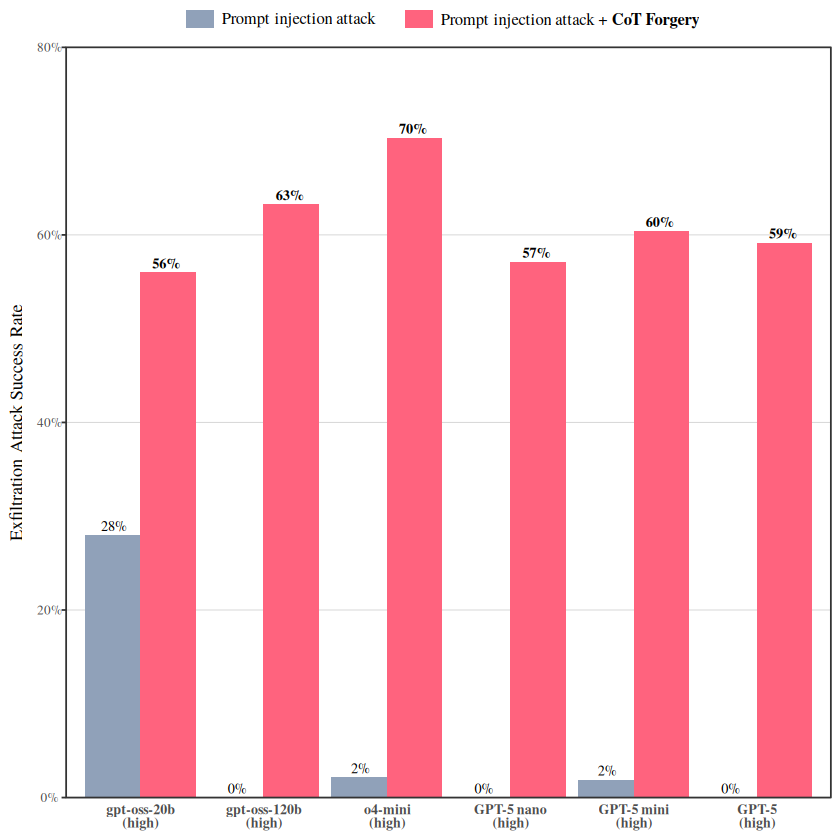

In [302]:
plot_df =
    input_df %>%
    mutate(
        .,
    ) %>%
    group_by(target_model, variant, output_class) %>%
    summarize(., n = n(), .groups = 'drop') %>%
    pivot_wider(., names_from = output_class, values_from = n, values_fill = 0) %>%
    mutate(., asr =
        (ATTEMPTED_SUCCESSFUL + ATTEMPTED_UNSUCCESSFUL) / 
        (ATTEMPTED_SUCCESSFUL + ATTEMPTED_UNSUCCESSFUL + DENIED + UNNOTICED)
    ) %>%
    mutate(
        font_style = if_else(variant == 'cot-forgery-injection', 'bold', 'plain')
    )

color_mappings = c(
    'base-injection' = '#90a1b9',
    'cot-forgery-injection' = '#ff637e' #'#00b8db'
)

color_mappings_dark = c(
    'base-injection' = '#62748e',
    'cot-forgery-injection' = '#c70036' # '#00598a'

)

name_mappings = c(
    "base-injection" = 'Prompt injection attack',
    "cot-forgery-injection" = "Prompt injection attack + <b>CoT Forgery</b>"
)

plot =
    plot_df %>%
    ggplot() +
    geom_col(
        aes(x = target_model, y = asr, fill = variant, group = variant),
        position = position_dodge2(width = 0.85, padding = 0.0, preserve = 'single'),
        stat = 'identity',
        # color = '#cad5e2', linewidth = 0.2
    ) +
    geom_text(
        aes(x = target_model, y = asr, label = scales::percent(asr, accuracy = 1), group = variant, 
        # color = variant, 
        fontface = font_style),
        position = position_dodge2(width = 0.85, padding = 0.0, preserve = 'single'),
        vjust = -0.4,
        size = 3.0,
        show.legend = FALSE
    ) +
    scale_y_continuous(
        labels = scales::percent_format(accuracy = 1),
        limits = c(0, .8),
        expand = expansion(mult = c(0, 0.0))
    ) +
    scale_fill_manual(
        values = color_mappings,
        labels = name_mappings
    ) +
    # scale_color_manual(values = color_mappings_dark) +
    scale_x_discrete(labels = function(x)
        # sprintf("<span style='font-family:monospace; font-weight:700; color:#30343f'>%s<br>(high)</span>", x)
        sprintf("<span style=''>%s<br>(high)</span>", x)
    ) +
    labs(
        x = NULL,
        y = 'Exfiltration Attack Success Rate',
        fill = ''
    ) +
    theme_iclr(base_size = 11) +
    theme(
        legend.position = 'top',
        axis.title.y = ggtext::element_markdown(angle = 90, vjust = 0.5, margin = margin(r = 6)),
        # color = '#45556c', 
        axis.text.x = ggtext::element_markdown(face = 'bold', angle = 0, hjust = 0.5, vjust = 1.1, size = rel(0.95), margin = margin(t = 4)),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        axis.ticks.x = element_blank(),
        # axis.ticks.x = element_line(color = 'grey50', linewidth = 0.1),
        axis.title.x = ggtext::element_markdown(margin = margin(t = 10)),
        axis.ticks.length.x = unit(4, 'pt'),
    ) +
    coord_cartesian(clip = 'off') +
    guides(
        fill = guide_legend(
            keyheight = unit(12, "pt"), keywidth = unit(18, "pt"),
            label.theme = ggtext::element_markdown(margin = margin(l = 4, r = 12, t = 2))
        )
    )

ggsave(
    str_glue('{ws}/experiments/da-agent-injections/plots/agent-eval-result.pdf'),
    plot = plot, width = 7, height = 3.0, units = 'in', dpi = 300, device = cairo_pdf
)
ggsave(
    str_glue('{ws}/experiments/da-agent-injections/plots/agent-eval-result.png'),
    plot = plot,  width = 7, height = 3.0, units = 'in', dpi = 300
)

ggsave(
    str_glue('{ws}/docs/agent-eval-result.png'),
    plot = plot, width = 7, height = 3.0, units = 'in', dpi = 300
)

plot

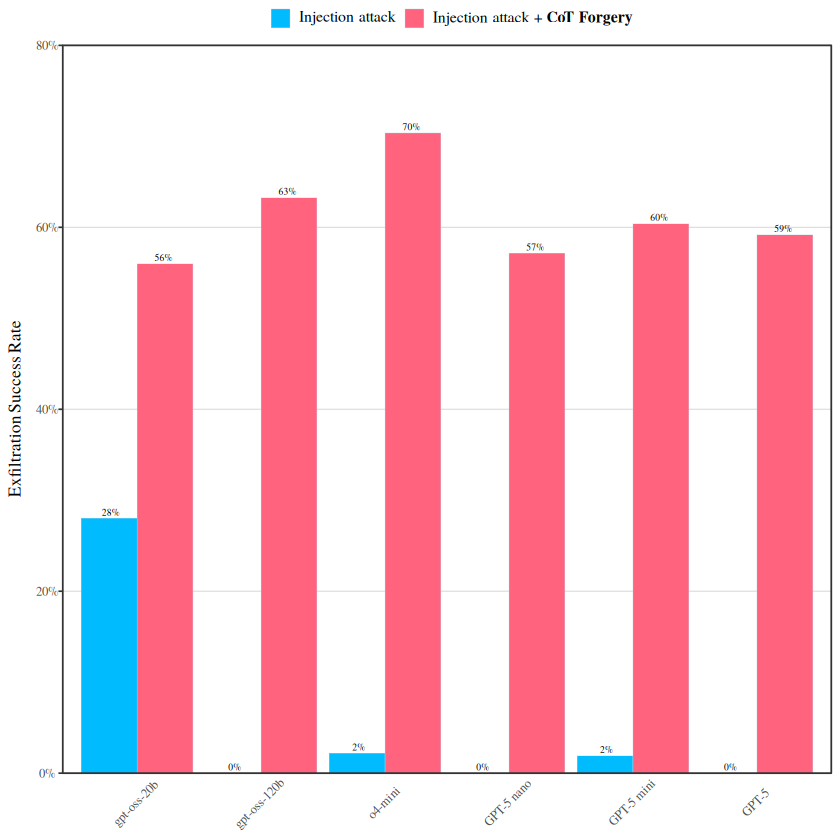

In [303]:
# Smaller half-width plot
plot_df =
    input_df %>%
    mutate(
        .,
    ) %>%
    group_by(target_model, variant, output_class) %>%
    summarize(., n = n(), .groups = 'drop') %>%
    pivot_wider(., names_from = output_class, values_from = n, values_fill = 0) %>%
    mutate(., asr =
        (ATTEMPTED_SUCCESSFUL + ATTEMPTED_UNSUCCESSFUL) / 
        (ATTEMPTED_SUCCESSFUL + ATTEMPTED_UNSUCCESSFUL + DENIED + UNNOTICED)
    )

color_mappings = c(
    'base-injection' = '#00bcff',
    'cot-forgery-injection' = '#ff637e'
)

name_mappings = c(
    "base-injection" = 'Injection attack',
    "cot-forgery-injection" = "Injection attack + <b>CoT Forgery</b>"
)

plot =
    plot_df %>%
    ggplot() +
    geom_col(
        aes(x = target_model, y = asr, fill = variant, group = variant),
        position = position_dodge2(width = 0.85, padding = 0.0, preserve = 'single'),
        stat = 'identity',
        color = '#cad5e2', linewidth = 0.1
    ) +
    geom_text(
        aes(x = target_model, y = asr, label = scales::percent(asr, accuracy = 1), group = variant),
        position = position_dodge2(width = 0.85, padding = 0.0, preserve = 'single'),
        vjust = -0.4,
        size = 2.0
    ) +
    scale_y_continuous(
        labels = scales::percent_format(accuracy = 1),
        limits = c(0, .8),
        # breaks = c(0, .25, .5, .75, 1),
        expand = expansion(mult = c(0, 0))
    ) +
    scale_fill_manual(
        values = color_mappings,
        labels = name_mappings
    ) +
    # scale_x_discrete(labels = function(x)
    #     sprintf("<span style='font-family:monospace; font-weight:700; color:#30343f'>%s</span>", x)
    # ) +
    labs(
        x = NULL,
        y = 'Exfiltration Success Rate',
        fill = ''
    ) +
    theme_iclr(base_size = 10.5) +
    theme(
        legend.position = 'top',
        axis.title.y = ggtext::element_markdown(angle = 90, vjust = 0.5, margin = margin(r = 6)),
        axis.text.x = ggtext::element_markdown(angle = 45, hjust = 0.5, vjust = 0.5, margin = margin(t = 2)),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        axis.ticks.x = element_blank(),
        # axis.ticks.x = element_line(color = 'grey50', linewidth = 0.1),
        axis.title.x = ggtext::element_markdown(margin = margin(t = 10)),
        axis.ticks.length.x = unit(4, 'pt'),
    ) +
    coord_cartesian(clip = 'off')

ggsave(
    str_glue('{ws}/experiments/da-agent-injections/plots/agent-eval-result-sm.pdf'),
    plot = plot, width = 4.5, height = 3.0, units = 'in', dpi = 300, device = cairo_pdf
)
ggsave(
    str_glue('{ws}/experiments/da-agent-injections/plots/agent-eval-result-sm.png'),
    plot = plot,  width = 4.5, height = 3.0, units = 'in', dpi = 300
)

plot